<a href="https://colab.research.google.com/github/AnaRian7/CODSOFT/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np # For arrays, mathematical functions, and linear algebra operations.
import pandas as pd # For data manipulation and analysis.
import matplotlib.pyplot as plt # For plotting and visualization.
import seaborn as sns # For statistical data visualization.
from sklearn.model_selection import train_test_split #For splitting the data into training and testing sets.
import statsmodels.api as sm                             #Building a linear model
from sklearn.metrics import mean_squared_error           #For checking the model performance
from sklearn.metrics import r2_score                     #For checking the model performance

# Data Collection and Preprocessing

In [ ]:
advertising = pd.read_csv('/content/advertising.csv') #Reading the data

**Printing 1st 10 rows and last 10 rows**

In [ ]:
advertising.head(10) #First 10 rows

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [ ]:
advertising.tail(10) #Last 10 rows

,TV,Radio,Newspaper,Sales
190,39.5,41.1,5.8,10.8
191,75.5,10.8,6.0,11.9
192,17.2,4.1,31.6,5.9
193,166.8,42.0,3.6,19.6
194,149.7,35.6,6.0,17.3
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


**Number of rows and columns**

In [ ]:
advertising.shape #Tells us the number of rows and columns

(200, 4)

In [ ]:
advertising.info() #Gives us the information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
advertising.describe() #Gives us the statistical information about the data

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


**Checking for null values**

In [ ]:
advertising.isnull().sum()*100/advertising.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

**Checking for outliers**

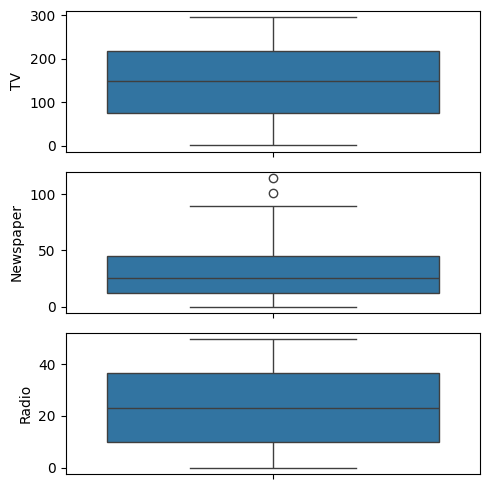

In [ ]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(advertising['TV'], ax = axs[0])
plt2 = sns.boxplot(advertising['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(advertising['Radio'], ax = axs[2])
plt.tight_layout()
plt.show()

**EDA**

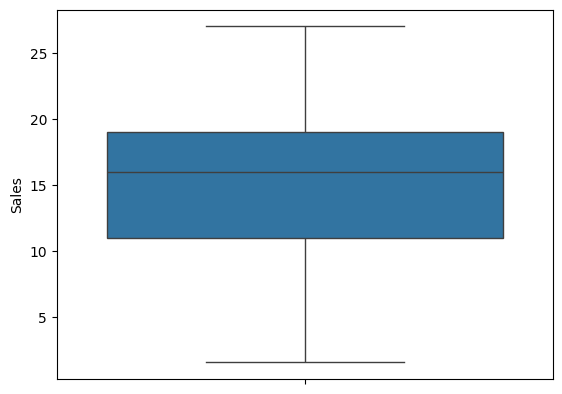

In [ ]:
sns.boxplot(advertising['Sales'])
plt.show()

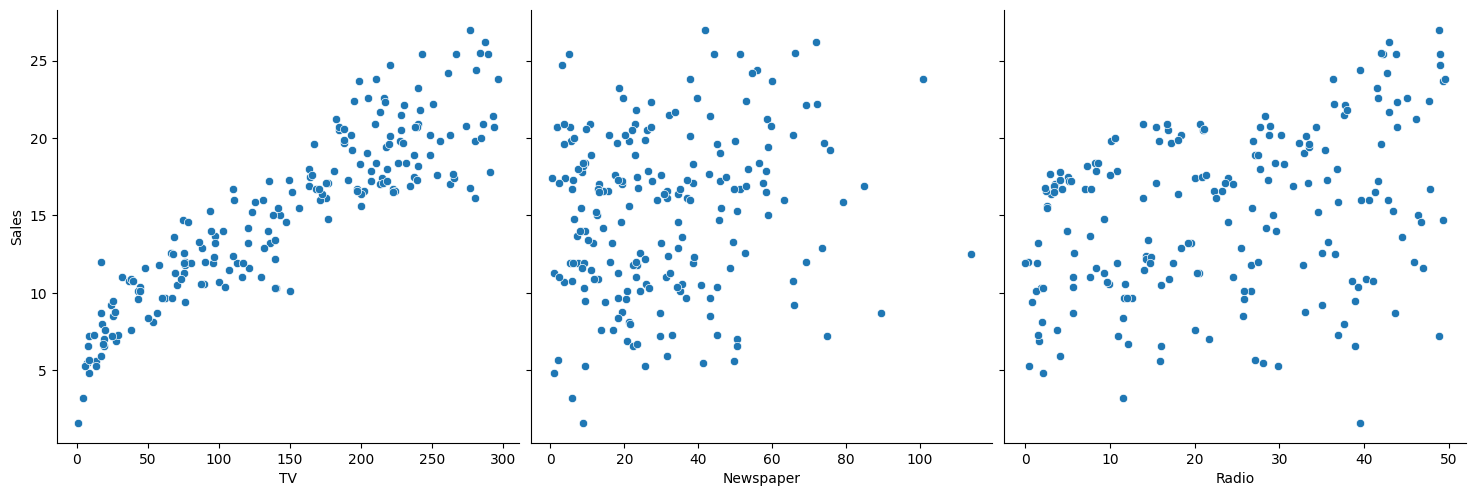

In [ ]:
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=5, aspect=1, kind='scatter')
plt.show()

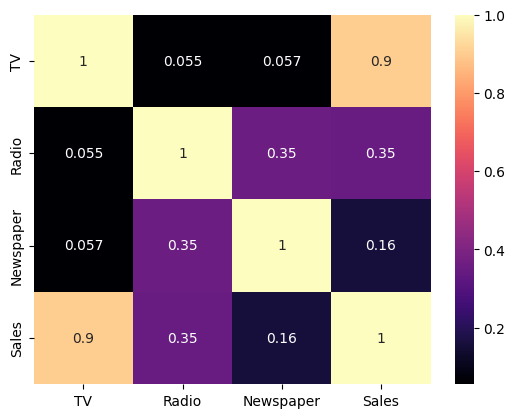

In [ ]:
sns.heatmap(advertising.corr(), cmap="magma", annot = True)
plt.show()

# Model Building

In [ ]:
X = advertising['TV']
Y = advertising['Sales']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
X_train.head(10)

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
127     80.2
81     239.8
88      88.3
119     19.4
110    225.8
Name: TV, dtype: float64

In [ ]:
Y_train.head(10)

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
127    11.9
81     17.3
88     12.9
119     6.6
110    18.4
Name: Sales, dtype: float64

In [ ]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

#Print the parameters
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [ ]:
#Summary operation listing all parameters of the regression line
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Tue, 23 Jul 2024   Prob (F-statistic):           1.52e-52
Time:                        13:26:14   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

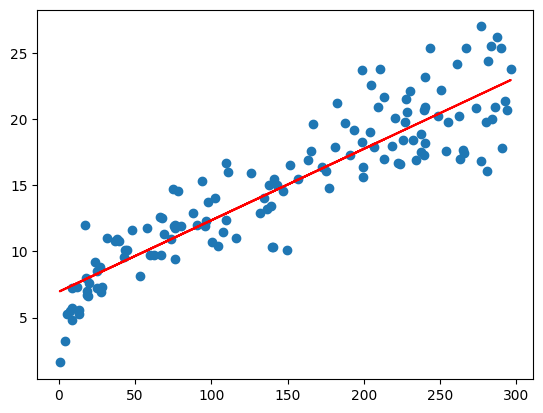

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r') # regression line
plt.show()

#Model Evaluation

In [ ]:
Y_train_pred = lr.predict(X_train_sm)
res = (Y_train - Y_train_pred)

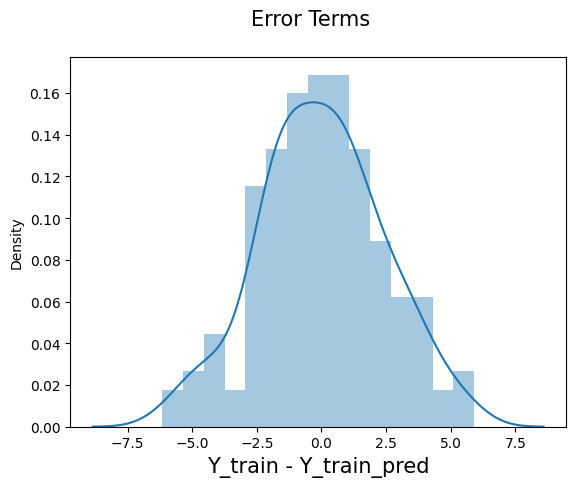

In [ ]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading
plt.xlabel('Y_train - Y_train_pred', fontsize = 15)         # X-label
plt.show()

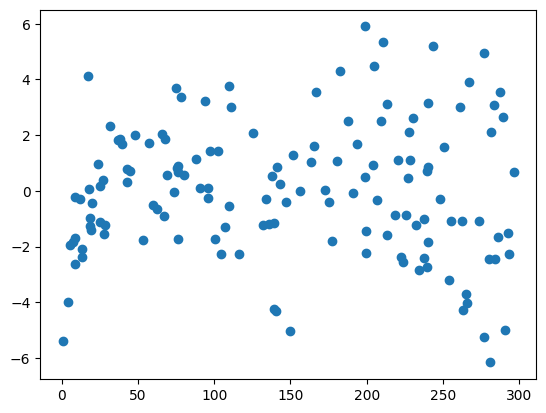

In [ ]:
plt.scatter(X_train,res)
plt.show()

In [ ]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
Y_pred = lr.predict(X_test_sm)

In [ ]:
Y_pred.head(10)

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
167    18.228745
116    14.541452
96     17.726924
52     18.752384
69     18.774202
dtype: float64

In [ ]:
np.sqrt(mean_squared_error(Y_test, Y_pred)) #RMSE

2.019296008966232

In [ ]:
r_squared = r2_score(Y_test, Y_pred)
r_squared

0.792103160124566

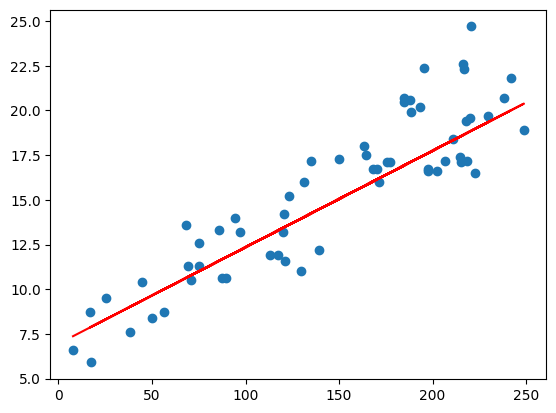

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()